In [ ]:
!pip install google-cloud-bigquery

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery
client = bigquery.Client(project='prism-insights')

In [ ]:
query = '''WITH sales_per_month AS (SELECT EXTRACT(YEAR FROM event_date) AS year,
                  EXTRACT(MONTH FROM event_date) AS month,
                  COUNT(event_name) AS num_sales
           FROM `prism-insights.prism_insights_dev.stg_funnel_events`
           WHERE event_name = 'purchase'
           GROUP BY year, month
           ORDER BY year, month)
           SELECT CONCAT(year, '-',month) AS yy_mm,
                  num_sales
           FROM sales_per_month
        '''
df = client.query(query).to_dataframe()

In [ ]:
# df.yy_mm = pd.to_datetime(df.yy_mm, format='%Y-%m', yearfirst=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   yy_mm      28 non-null     object
 1   num_sales  28 non-null     Int64 
dtypes: Int64(1), object(1)
memory usage: 604.0+ bytes


In [ ]:
df

,yy_mm,num_sales
0,2020-1,13240
1,2020-2,12079
2,2020-3,13359
3,2020-4,18047
4,2020-5,29450
5,2020-6,26768
6,2020-7,21333
7,2020-8,16277
8,2020-9,16165
9,2020-10,16943


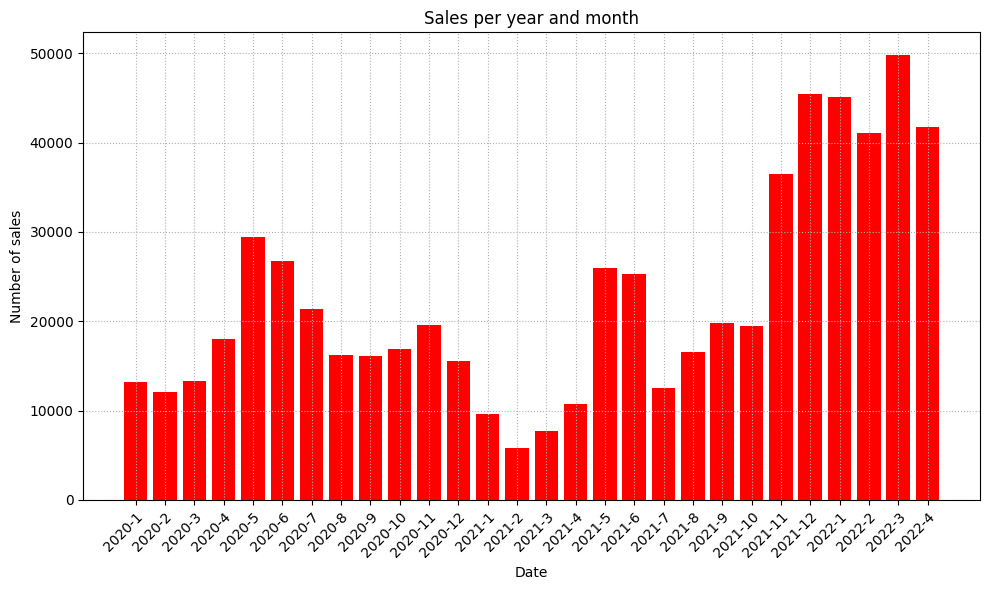

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df.yy_mm, df.num_sales, color='red')
# ax.set_xticks(range(28), df.yy_mm)
ax.set_xlabel('Date')
ax.set_ylabel('Number of sales')
ax.set_title('Sales per year and month')
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor", rotation=45)
plt.grid(linestyle=':')
plt.tight_layout();

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
df.yy_mm = pd.to_datetime(df.yy_mm, format='%Y-%m')

In [ ]:
df.head()

,yy_mm,num_sales
0,2020-01-01,13240
1,2020-02-01,12079
2,2020-03-01,13359
3,2020-04-01,18047
4,2020-05-01,29450


In [ ]:
rr = Ridge()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.yy_mm, df.num_sales, test_size=0.2, random_state=42)
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22, 1), (22, 1), (6, 1), (6, 1))

In [ ]:
rr.fit(X_train, y_train)

Ridge()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

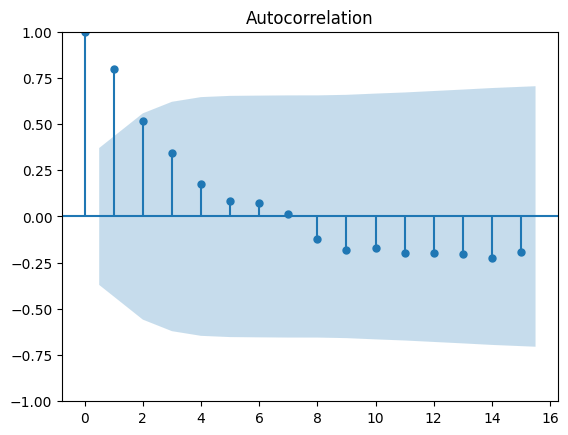

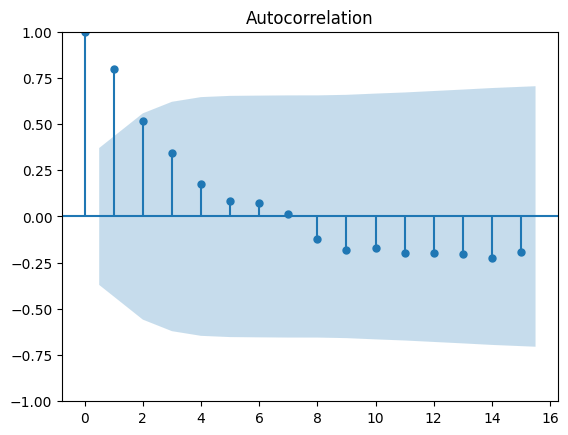

In [ ]:
plot_acf(df.num_sales)

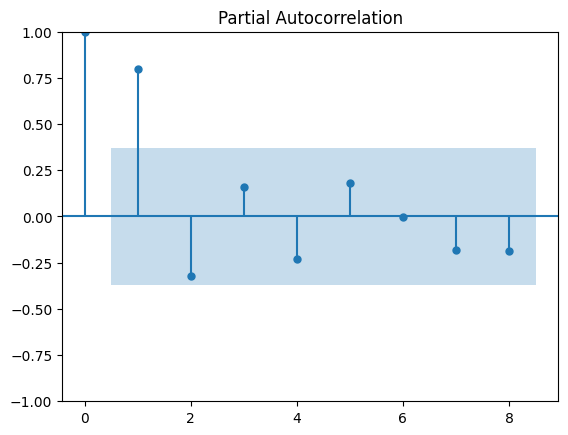

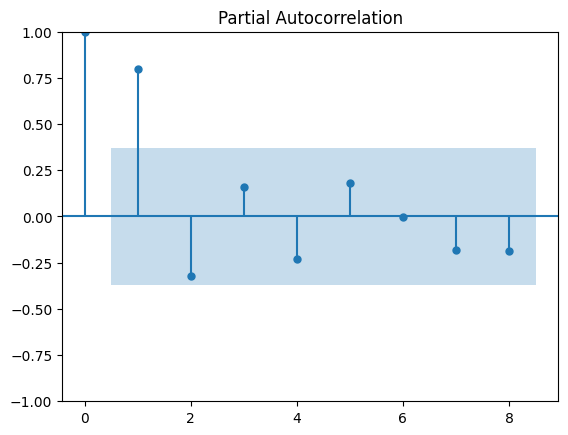

In [ ]:
plot_pacf(df.num_sales, lags=8)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df.num_sales

0     13240
1     12079
2     13359
3     18047
4     29450
5     26768
6     21333
7     16277
8     16165
9     16943
10    19632
11    15528
12     9641
13     5823
14     7689
15    10787
16    25909
17    25299
18    12540
19    16515
20    19801
21    19465
22    36436
23    45388
24    45109
25    41089
26    49840
27    41735
Name: num_sales, dtype: Int64

In [ ]:
df = df.astype(int)


In [ ]:
import numpy as np
# Check for missing or NaN values in sales_data
if np.isnan(df.num_sales).any():
    # Handle missing values, such as filling them with a suitable method
    sales_data = np.nan_to_num(sales_data)  # Replace NaN with 0, you can use other methods too



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Building the ARIMA model
model = ARIMA(df.num_sales, order=(2, 1, 1))
model_fit = model.fit()

# Forecasting the next 10 months
forecast = model_fit.forecast(steps=12)

forecast

28    38232.912084
29    40079.089023
30    40565.383205
31    40173.725494
32    40118.742022
33    40197.363863
34    40200.397411
35    40185.356740
36    40186.181550
37    40188.928632
38    40188.519134
39    40188.041393
Name: predicted_mean, dtype: float64